In [7]:
import numpy as np
import nashpy as nash
import ipywidgets as widgets
from IPython.display import display

In [45]:
def computeNashEq(state, payoff_matrixA, payoff_matrixB):
    game = nash.Game(payoff_matrixA[state, :, :, 0], payoff_matrixB[state, :, :, 1])
    eqs = game.vertex_enumeration()
    try:
        eq = next(eqs)
        print(eq)
        return np.abs(eq)
    except Exception:
        a = 1
        b = 0
        return [[a, 1 - a], [b, 1 - b]]

In [9]:
def reward(state, player1_action, player2_action, payoffMatrix):
    return payoffMatrix[state, player1_action, player2_action]

In [10]:
def expectedPayoff(payoff_matrix, player1_strategy, player2_strategy):
    expected_payoff = np.dot(np.dot(player1_strategy, payoff_matrix), player2_strategy)
    return expected_payoff
    

In [11]:
def nashQlearning(n_players, q, alfa, gamma, epsilon, pure_training_ep, actions_per_player, transition_matrix, n_games, reward_matrix):
    #NashQ
    ALPHA = alfa
    GAMMA = gamma
    EPSILON = epsilon
    PURE_TRAINING_EPISODES = pure_training_ep
    TRANSITION_MATRIX = transition_matrix
    A = actions_per_player
    N = n_players
    Q = q
    
    qTables = [np.zeros((Q, A, A, N)) for _ in range(N)] #QTable for each player

    state = 0
    totalReward = [np.array([0, 0]) for _ in range(N)]
    diffs = [[]for _ in range(N)]
    NashQRewards = [[]for _ in range(N)]
    NashEquilibria = [[]for _ in range(N)]
    nashEq = [np.array([0.5, 0.5]), np.array([0.5, 0.5])]

    gamesLoadingBarNashQ = widgets.IntProgress(
        value=0,
        min=0,
        max=n_games-1,
        step=1,
        description='Games:',
        bar_style='info',
    )

    display(gamesLoadingBarNashQ)

    playerLoadingBar = widgets.IntProgress(
        value=0,
        min=0,
        max=N-1,
        step=1,
        description='Players:',
        bar_style='info',
    )

    display(playerLoadingBar)

    for t in range(n_games):
        ALPHA = 1 / (t + 1 - PURE_TRAINING_EPISODES) if t >= PURE_TRAINING_EPISODES else ALPHA
        player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
        player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)

        next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])

        r = reward(state, player1_action, player2_action, reward_matrix)
        for i in range(N):
            playerLoadingBar.value = i
            qTable = qTables[i]

            nashEq = np.abs(computeNashEq(state, qTable, reward_matrix))

            NashEquilibria[i].append(nashEq)

            next_NashEq = computeNashEq(next_state, qTable, reward_matrix)
            next_qVal_0 = expectedPayoff(qTable[next_state, :, :, 0], next_NashEq[0], next_NashEq[1])
            next_qVal_1 = expectedPayoff(qTable[next_state, :, :, 1], next_NashEq[0], next_NashEq[1])
            oldQ = qTable[state, player1_action, player2_action].copy()
            qTable[state, player1_action, player2_action, 0] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 0] + ALPHA * (r[0] + GAMMA * next_qVal_0)
            qTable[state, player1_action, player2_action, 1] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 1] + ALPHA * (r[1] + GAMMA * next_qVal_1)

            diffs[i].append(qTable[state, player1_action, player2_action] - oldQ)
            
            totalReward[i] += r
            NashQRewards[i].append(r)
            print(qTables[i])
        state = next_state
        gamesLoadingBarNashQ.value += 1
    return totalReward, diffs, NashQRewards, NashEquilibria



TestSet 1

In [37]:
Q_0 = 2 #Number of games
N_0 = 2 #Number of players
A_0 = 2 #Number of actions per player
n_games_0 = 2000 #number of repetitions

# Player1 action / Player2 action / starting state / ending state / probability
#Deterministic transition matrix
TRANSITION_MATRIX_0 = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 
            [
                [0, 1],
                [0, 1]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0],
                [1, 0]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0],
                [1, 0]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0],
                [1, 0]
                
            ]
        ]
    ]
)

# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX_0 = np.array([
    # State 0
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [-1, -1] ]
    ],
    # State 1
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [-1, -1] ]
    ]
])

TestSet 2

In [13]:
Q_1 = 2 #Number of games
N_1 = 2 #Number of players
A_1 = 2 #Number of actions per player
n_games_1 = 5000 #number of repetitions

# Player1 action / Player2 action / starting state / ending state / probability
#Deterministic transition matrix
TRANSITION_MATRIX_1 = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 
            [
                [0, 1],
                [0, 1]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0],
                [1, 0]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0],
                [1, 0]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0],
                [1, 0]
                
            ]
        ]
    ]
)

# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX_1 = np.array([
    # State 0
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [0, 0] ]
    ],
    # State 1
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [0, 0] ]
    ]
])

TestSet 3

In [14]:
Q_2 = 3 #Number of games
N_2 = 2 #Number of players
A_2 = 2 #Number of actions per player
n_games_2 = 2000 #number of repetitions

# Player1 action / Player2 action / starting state / ending state / probability
#Deterministic transition matrix
TRANSITION_MATRIX_2 = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 
            [
                [0, 1, 0],
                [0, 0, 1],
                [0, 0, 1]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0, 0],
                [0, 1, 0],
                [0, 1, 0]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0, 0],
                [0, 1, 0],
                [0, 1, 0]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0, 0],
                [0, 1, 0],
                [1, 0, 0]
                
            ]
        ]
    ]
)

# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX_2 = np.array([
    # State 0
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [-1, -1] ]
    ],
    # State 1
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [-1, -1] ]
    ],
    # State 2
    [
        [ [1, 1], [0, 0] ],
        [ [0,0], [-2, -2] ]
    ]
])

In [15]:
N=[N_0, N_1, N_2]
Q=[Q_0, Q_1, Q_2]
A=[A_0, A_1, A_2]
n_games=[n_games_0, n_games_1, n_games_2]
TRANSITION_MATRIX=[TRANSITION_MATRIX_0, TRANSITION_MATRIX_1, TRANSITION_MATRIX_2]
PAYOFF_MATRIX=[PAYOFF_MATRIX_0, PAYOFF_MATRIX_1, PAYOFF_MATRIX_2]

x = 2

In [16]:
#Simulate plays with nash policy
state = 0
totalReward = np.array([0, 0])
localNashRewards = []
EPSILON = 0.02

gamesLoadingBarLocalNash = widgets.IntProgress(
    value=0,
    min=0,
    max=n_games[x]-1,
    step=1,
    description='Games:',
    bar_style='info',
)

display(gamesLoadingBarLocalNash)

for _ in range(n_games[x]):
    print("State:", state)
    nashEq = computeNashEq(state, PAYOFF_MATRIX[x], PAYOFF_MATRIX[x])
    print("Nash equilibrium:", nashEq)
    player1_action = np.random.choice(A[x], p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A[x])
    player2_action = np.random.choice(A[x], p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A[x])
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q[x]), p=TRANSITION_MATRIX[x][player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action, PAYOFF_MATRIX[x])
    print("Reward:", r)
    state = next_state
    totalReward += r
    localNashRewards.append(r)
    gamesLoadingBarLocalNash.value += 1
print("Total reward:", totalReward/n_games[x])

IntProgress(value=0, bar_style='info', description='Games:', max=1999)

State: 0
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next

Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.16333634e-17]
 [1.00000000e+00 4.16333634e-17]]
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [1 1]
State: 2
Nash equilibrium: [[1.00000000e+00 4.163

In [17]:
#apply nashQlearning
totalReward, diffs, NashQRewards, NashEquilibria = nashQlearning(N[x], Q[x], 0.5, 0.8, 0.25, 1500, A[x], TRANSITION_MATRIX[x], n_games[x], PAYOFF_MATRIX[x])

IntProgress(value=0, bar_style='info', description='Games:', max=1999)

IntProgress(value=0, bar_style='info', description='Players:', max=1)

[[[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [-0.5 -0.5]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]]
[[[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [-0.5 -0.5]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]]
[[[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [-0.5 -0.5]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]]
[[[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [-0.5 -0.5]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]]
[[[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [-0.5 -0.5]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]


 [[[ 0.   0. ]
   [ 0.   0. ]]

  [[ 0.   0. ]
   [ 0.   0. ]]]]
[[[[ 0.   0. ]


/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


[[[[ 9.50000000e-01  9.50000000e-01]
   [ 2.00000000e-01  2.00000000e-01]]

  [[-6.91497783e-18 -6.91497783e-18]
   [-9.37500000e-01 -9.37500000e-01]]]


 [[[ 1.07500000e+00  1.07500000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 2.00000000e-01  2.00000000e-01]
   [ 0.00000000e+00  0.00000000e+00]]]


 [[[ 5.00000000e-01  5.00000000e-01]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 3.00000000e-01  3.00000000e-01]
   [-8.00000000e-01 -8.00000000e-01]]]]
[[[[ 9.50000000e-01  9.50000000e-01]
   [ 2.00000000e-01  2.00000000e-01]]

  [[-6.91497783e-18 -6.91497783e-18]
   [-9.37500000e-01 -9.37500000e-01]]]


 [[[ 1.07500000e+00  1.07500000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 2.00000000e-01  2.00000000e-01]
   [ 0.00000000e+00  0.00000000e+00]]]


 [[[ 5.00000000e-01  5.00000000e-01]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 3.00000000e-01  3.00000000e-01]
   [-8.00000000e-01 -8.00000000e-01]]]]
[[[[ 9.50000000e-01  9.50000000e-01]
   [ 2.00000000e-01  2.00000000e-01]]

  

(2000, 2)
(2000, 2)


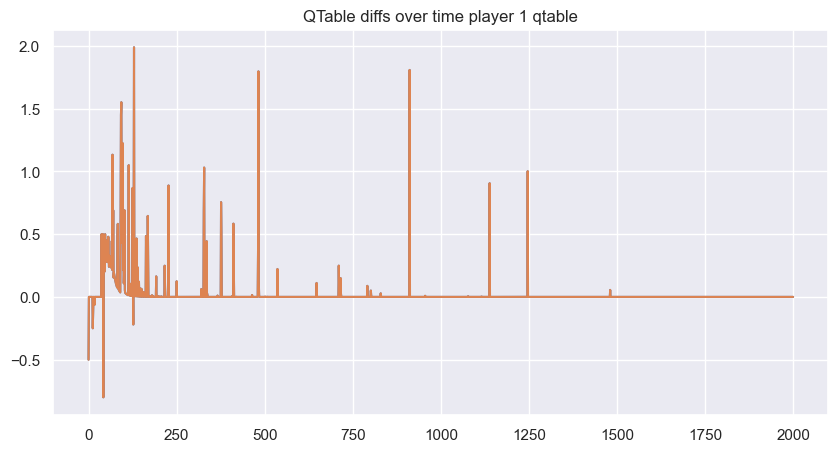

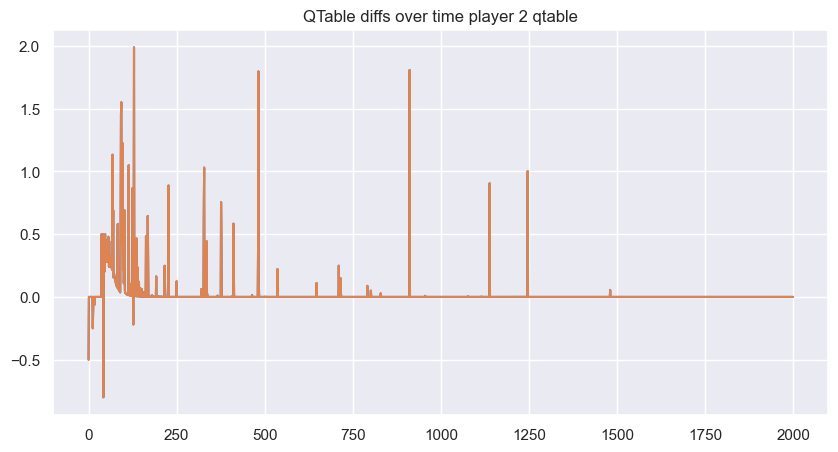

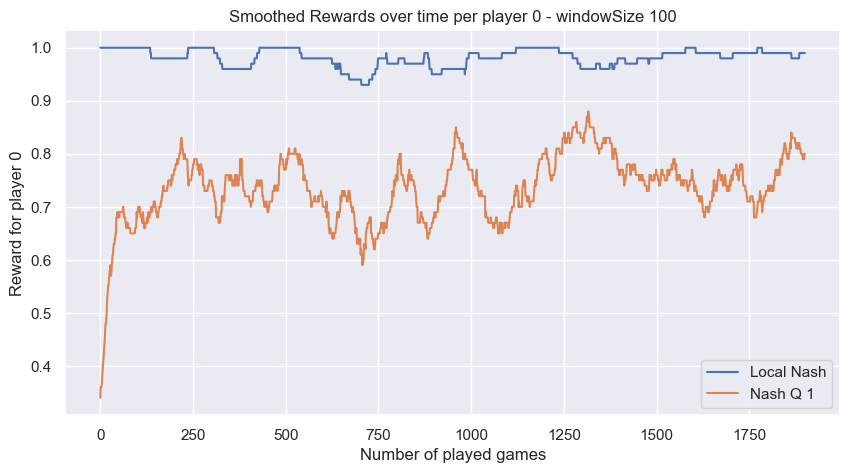

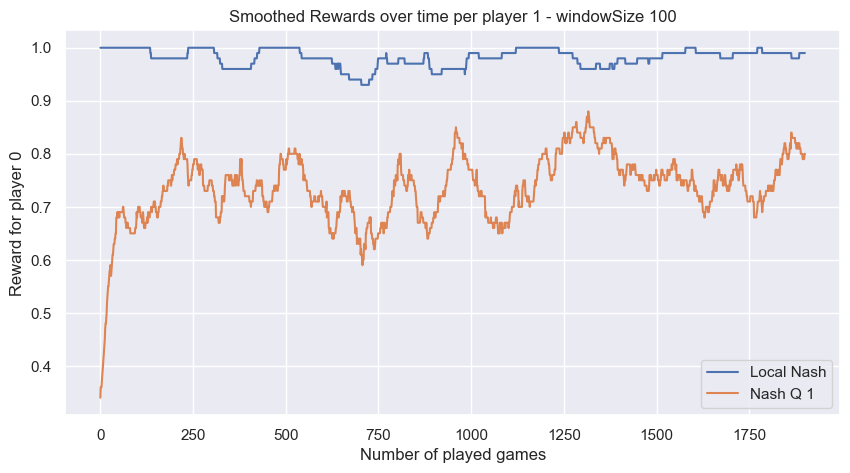

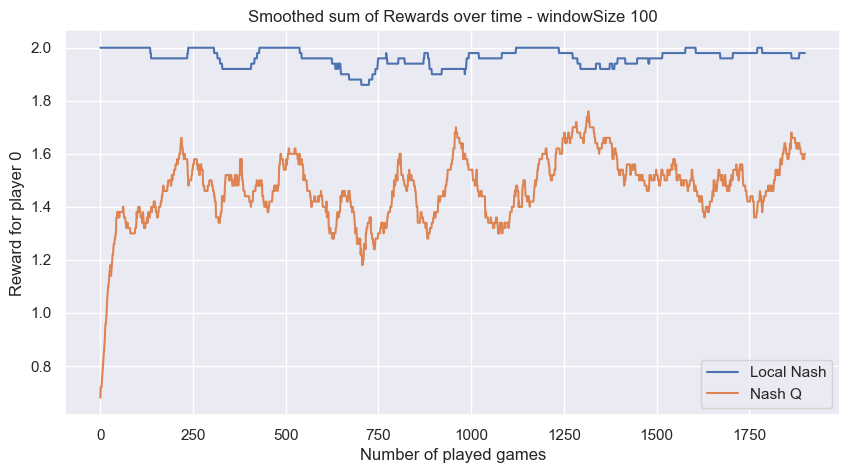

In [18]:
#plot the outcomes
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

for i in range(N[x]):
    diffs[i] = np.array(diffs[i])
    print(diffs[i].shape)
    diffs[i]
    NashQRewards[i] = np.array(NashQRewards[i])

localNashRewards = np.array(localNashRewards)
NashQRewards = np.array(NashQRewards)
diffs = np.array(diffs)

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 1 qtable")
for i in range(N[x]):
    sns.lineplot(data=diffs[i, :, 0])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("QTable diffs over time player 2 qtable")
for i in range(N[x]):
    sns.lineplot(data=diffs[i, :, 1])
plt.show()

# smooth the data
window = 100

cumsum = np.cumsum(localNashRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_0 = cumsum[window - 1:] / window

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 0 - windowSize {window}")
sns.lineplot(data=localNashRewardsSmooth_0, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_0, label="Nash Q "+str(i))
#plt.ylim(0.5,1.2)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

cumsum = np.cumsum(localNashRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_1 = cumsum[window - 1:] / window


plt.figure(figsize=(10, 5))
plt.title(f"Smoothed Rewards over time per player 1 - windowSize {window}")
sns.lineplot(data=localNashRewardsSmooth_1, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_1, label="Nash Q "+str(i))
#plt.ylim(0.5,1.2)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()

localNashRewardsSmooth_sum = localNashRewardsSmooth_0 + localNashRewardsSmooth_1
NashQRewardsSmooth_sum = NashQRewardsSmooth_0 + NashQRewardsSmooth_1

plt.figure(figsize=(10, 5))
plt.title(f"Smoothed sum of Rewards over time - windowSize {window}")
sns.lineplot(data=localNashRewardsSmooth_sum, label="Local Nash")
sns.lineplot(data=NashQRewardsSmooth_sum, label="Nash Q")
#plt.ylim(0.5,4)
plt.xlabel("Number of played games")
plt.ylabel("Reward for player 0")
plt.show()


In [33]:
rewardMatrix = np.array(
    [
        #Pl0 A0
        [
            #Pl1 A0
            [
                #Pl2 A0
                [1,1,1],
                #Pl2 A1
                [0,0,0]
            ],
            #Pl1 A1
            [
                #Pl2 A0
                [0,0,0],
                #Pl2 A1
                [-1,-1,-1]
            ]
        ],
        #Pl0 A1
        [
            #Pl1 A0
            [
                #Pl2 A0
                [0,0,0],
                #Pl2 A1
                [-1,-1,-1]
            ],
            #Pl1 A1
            [
                #Pl2 A0
                [-1,-1,-1],
                #Pl2 A1
                [-2,-2,-2]
            ]
        ]
    ])

In [28]:
game = nash.Game(rewardMatrix[:, :, :, 0], rewardMatrix[:, :, :, 1])
eqs = game.vertex_enumeration()
try:
    eq = next(eqs)
    print(np.abs(eq))
except Exception:
    a = 1
    b = 0
    print([[a, 1 - a], [b, 1 - b]])

AttributeError: 'Game' object has no attribute 'payoff_matrices'

In [ ]:
game = nash.Game(rewardMatrix[:, :, :, 1], rewardMatrix[:, :, :, 2])
eqs = game.vertex_enumeration()
try:
    eq = next(eqs)
    print(np.abs(eq))
except Exception:
    a = 1
    b = 0
    print([[a, 1 - a], [b, 1 - b]])

In [35]:
foundEq =[]

game = nash.Game(rewardMatrix[0,:,:,1], rewardMatrix[0,:,:,2])
eqs = game.vertex_enumeration()
try:
    eq = next(eqs)
    print(np.abs(eq))
except Exception:
    a = 1
    b = 0
    print("exceptionnnn")

foundEq.append(eq)

game = nash.Game(rewardMatrix[1,:,:,1], rewardMatrix[1,:,:,2])

game = nash.Game(rewardMatrix[:,0,:,0], rewardMatrix[:,0,:,2])
game = nash.Game(rewardMatrix[:,1,:,0], rewardMatrix[:,1,:,2])
game = nash.Game(rewardMatrix[:,:,0,0], rewardMatrix[:,:,0,1])
game = nash.Game(rewardMatrix[:,:,1,0], rewardMatrix[:,:,1,1])

[[1. 0.]
 [1. 0.]]


AttributeError: 'numpy.ndarray' object has no attribute 'insert'